<a href="https://colab.research.google.com/github/Mahsa33/Ollama-and-Cohere-Customer-Support-Bot/blob/main/Persian_Customer_Support_Bot_Ollama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install ngrock

In [ ]:
!pip install aiohttp pyngrok

In [ ]:
!ngrok config add-authtoken 2gGSIbR3ABcEM3azC0hgGOgdD1K_5LwLgkR8NQnShyVVLa42S

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!curl https://ollama.ai/install.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0>>> Downloading ollama...
100 10091    0 10091    0     0  19387      0 --:--:-- --:--:-- --:--:-- 19405
############################################################################################# 100.0%
>>> Installing ollama to /usr/local/bin...
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
import asyncio
from pyngrok import ngrok
import threading
import queue
import time
from threading import Thread

# Get your ngrok token from your ngrok account:
# https://dashboard.ngrok.com/get-started/your-authtoken
token=" "
ngrok.set_auth_token(token)

# set up a stoppable thread (not mandatory, but cleaner if you want to stop this later
class StoppableThread(threading.Thread):
    def __init__(self, *args, **kwargs):
        super(StoppableThread, self).__init__(*args, **kwargs)
        self._stop_event = threading.Event()

    def stop(self):
        self._stop_event.set()

    def is_stopped(self):
        return self._stop_event.is_set()

def start_ngrok(q, stop_event):
    try:
        # Start an HTTP tunnel on the specified port
        public_url = ngrok.connect(11434)
        # Put the public URL in the queue
        q.put(public_url)
        # Keep the thread alive until stop event is set
        while not stop_event.is_set():
            time.sleep(1)  # Adjust sleep time as needed
    except Exception as e:
        print(f"Error in start_ngrok: {e}")

In [ ]:
import os
import asyncio

# NB: You may need to set these depending and get cuda working depending which backend you are running.
# Set environment variable for NVIDIA library
# Set environment variables for CUDA
os.environ['PATH'] += ':/usr/local/cuda/bin'
# Set LD_LIBRARY_PATH to include both /usr/lib64-nvidia and CUDA lib directories
os.environ['LD_LIBRARY_PATH'] = '/usr/lib64-nvidia:/usr/local/cuda/lib64'

async def run_process(cmd):
    print('>>> starting', *cmd)
    process = await asyncio.create_subprocess_exec(
        *cmd,
        stdout=asyncio.subprocess.PIPE,
        stderr=asyncio.subprocess.PIPE
    )

    # define an async pipe function
    async def pipe(lines):
        async for line in lines:
            print(line.decode().strip())

        await asyncio.gather(
            pipe(process.stdout),
            pipe(process.stderr),
        )

    # call it
    await asyncio.gather(pipe(process.stdout), pipe(process.stderr))

In [ ]:
!ollama serve

Couldn't find '/root/.ollama/id_ed25519'. Generating new private key.
Your new public key is: 

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIJh+lxim7TSwAKUe8z7BaPpHOH28ApPbHA3BEaSZVkSH

2024/05/10 15:07:31 routes.go:989: INFO server config env="map[OLLAMA_DEBUG:false OLLAMA_LLM_LIBRARY: OLLAMA_MAX_LOADED_MODELS:1 OLLAMA_MAX_QUEUE:512 OLLAMA_MAX_VRAM:0 OLLAMA_NOPRUNE:false OLLAMA_NUM_PARALLEL:1 OLLAMA_ORIGINS:[http://localhost https://localhost http://localhost:* https://localhost:* http://127.0.0.1 https://127.0.0.1 http://127.0.0.1:* https://127.0.0.1:* http://0.0.0.0 https://0.0.0.0 http://0.0.0.0:* https://0.0.0.0:*] OLLAMA_RUNNERS_DIR: OLLAMA_TMPDIR:]"
time=2024-05-10T15:07:31.776Z level=INFO source=images.go:897 msg="total blobs: 0"
time=2024-05-10T15:07:31.776Z level=INFO source=images.go:904 msg="total unused blobs removed: 0"
time=2024-05-10T15:07:31.778Z level=INFO source=routes.go:1034 msg="Listening on 127.0.0.1:11434 (version 0.1.34)"
time=2024-05-10T15:07:31.779Z level=INFO source

#Ollama

In [ ]:
import asyncio
import threading

async def start_ollama_serve():
    await run_process(['ollama', 'serve'])

def run_async_in_thread(loop, coro):
    asyncio.set_event_loop(loop)
    loop.run_until_complete(coro)
    loop.close()

# Create a new event loop that will run in a new thread
new_loop = asyncio.new_event_loop()

# Start ollama serve in a separate thread so the cell won't block execution
thread = threading.Thread(target=run_async_in_thread, args=(new_loop, start_ollama_serve()))
thread.start()

>>> starting

In [ ]:
!ollama pull llama3

[GIN] 2024/05/10 - 15:10:30 | 200 |      55.072µs |       127.0.0.1 | HEAD     "/"
pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ time=2024-05-10T15:10:32.114Z level=INFO source=download.go:136 msg="downloading 00e1317cbf74 in 47 100 MB part(s)"
pulling manifest ⠴ pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling man

In [ ]:
%%capture --no-stderr
!pip install -U langgraph langchain-community langchain-anthropic tavily-python pandas

#Set API-KEY

In [ ]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("TAVILY_API_KEY")
_set_env("LANGCHAIN_API_KEY")


os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Customer Support Bot Tutorial"

TAVILY_API_KEY: ··········
LANGCHAIN_API_KEY: ··········


#Pre-Process Sqlite Database

In [ ]:
import os
import shutil
import sqlite3

import pandas as pd
import requests

db_url = "https://storage.googleapis.com/benchmarks-artifacts/travel-db/travel2.sqlite"
local_file = "travel2.sqlite"
# The backup lets us restart for each tutorial section
backup_file = "travel2.backup.sqlite"
overwrite = False
if overwrite or not os.path.exists(local_file):
    response = requests.get(db_url)
    response.raise_for_status()  # Ensure the request was successful
    with open(local_file, "wb") as f:
        f.write(response.content)
    # Backup - we will use this to "reset" our DB in each section
    shutil.copy(local_file, backup_file)
# Convert the flights to present time for our tutorial
conn = sqlite3.connect(local_file)
cursor = conn.cursor()

tables = pd.read_sql(
    "SELECT name FROM sqlite_master WHERE type='table';", conn
).name.tolist()
tdf = {}
for t in tables:
    tdf[t] = pd.read_sql(f"SELECT * from {t}", conn)

example_time = pd.to_datetime(
    tdf["flights"]["actual_departure"].replace("\\N", pd.NaT)
).max()
current_time = pd.to_datetime("now").tz_localize(example_time.tz)
time_diff = current_time - example_time

tdf["bookings"]["book_date"] = (
    pd.to_datetime(tdf["bookings"]["book_date"].replace("\\N", pd.NaT), utc=True)
    + time_diff
)

datetime_columns = [
    "scheduled_departure",
    "scheduled_arrival",
    "actual_departure",
    "actual_arrival",
]
for column in datetime_columns:
    tdf["flights"][column] = (
        pd.to_datetime(tdf["flights"][column].replace("\\N", pd.NaT)) + time_diff
    )

for table_name, df in tdf.items():
    df.to_sql(table_name, conn, if_exists="replace", index=False)
del df
del tdf
conn.commit()
conn.close()

db = local_file  # We'll be using this local file as our DB in this tutorial

In [ ]:
#!ollama pull llava:13b-v1.5-q4_0

In [ ]:
#!ollama pull llama3:70b

Streaming output truncated to the last 5000 lines.
pulling 8ab4849b038c... 100% ▕▏  254 B                         
pulling 577073ffcc6c... 100% ▕▏  110 B                         
pulling fa25612cd8dc... 100% ▕▏  484 B                         
verifying sha256 digest ⠹ pulling manifest 
pulling 4fe022a89023... 100% ▕▏  39 GB                         
pulling 4fa551d4f938... 100% ▕▏  12 KB                         
pulling 8ab4849b038c... 100% ▕▏  254 B                         
pulling 577073ffcc6c... 100% ▕▏  110 B                         
pulling fa25612cd8dc... 100% ▕▏  484 B                         
verifying sha256 digest ⠸ pulling manifest 
pulling 4fe022a89023... 100% ▕▏  39 GB                         
pulling 4fa551d4f938... 100% ▕▏  12 KB                         
pulling 8ab4849b038c... 100% ▕▏  254 B                         
pulling 577073ffcc6c... 100% ▕▏  110 B                         
pulling fa25612cd8dc... 100% ▕▏  484 B                         
verifying sha256 digest ⠼ pul

#Embedding DOCS

In [ ]:
from langchain_community.llms import Ollama
from langchain_community.embeddings import OllamaEmbeddings

In [ ]:
import re

import numpy as np
#import openai
from langchain_core.tools import tool

response = requests.get(
    "https://storage.googleapis.com/benchmarks-artifacts/travel-db/swiss_faq.md"
)
response.raise_for_status()
faq_text = response.text

docs = [{"page_content": txt} for txt in re.split(r"(?=\n##)", faq_text)]


class VectorStoreRetriever:
    def __init__(self, docs: list, vectors: list, embeddings):
        self._arr = np.array(vectors)
        self._docs = docs
        self._embeddings = embeddings

    @classmethod
    def from_docs(cls, docs, embeddings):
        truncated_texts = [doc["page_content"]for doc in docs]
        vectors = embeddings.embed_documents(truncated_texts)
        return cls(docs, vectors, embeddings)

    def query(self, query: str, k: int = 5) -> list[dict]:
        query_embedding = self._embeddings.embed_texts([query])[0]
        scores = np.dot(query_embedding, self._arr.T)
        top_k_idx = np.argpartition(scores, -k)[-k:]
        top_k_idx_sorted = top_k_idx[np.argsort(-scores[top_k_idx])]
        return [
            {**self._docs[idx], "similarity": scores[idx]} for idx in top_k_idx_sorted
        ]


retriever = VectorStoreRetriever.from_docs(docs,OllamaEmbeddings(model="llama3"))


@tool
def lookup_policy(query: str) -> str:
    """Consult the company policies to check whether certain options are permitted.
    Use this before making any flight changes performing other 'write' events."""
    docs = retriever.query(query, k=2)
    return "\n\n".join([doc["page_content"] for doc in docs])

time=2024-05-10T15:15:09.031Z level=INFO source=gpu.go:122 msg="Detecting GPUs"
time=2024-05-10T15:15:09.065Z level=INFO source=cpu_common.go:11 msg="CPU has AVX2"
time=2024-05-10T15:15:10.823Z level=INFO source=cpu_common.go:11 msg="CPU has AVX2"
time=2024-05-10T15:15:10.824Z level=INFO source=server.go:305 msg="starting llama server" cmd="/tmp/ollama4194791431/runners/cpu_avx2/ollama_llama_server --model /root/.ollama/models/blobs/sha256-00e1317cbf74d901080d7100f57580ba8dd8de57203072dc6f668324ba545f29 --ctx-size 2048 --batch-size 512 --embedding --log-disable --parallel 1 --port 38607"
time=2024-05-10T15:15:10.830Z level=INFO source=sched.go:326 msg="loaded runners" count=1
time=2024-05-10T15:15:10.830Z level=INFO source=server.go:464 msg="waiting for llama runner to start responding"
{"function":"server_params_parse","level":"INFO","line":2604,"msg":"logging to file is disabled.","tid":"133720258725760","timestamp":1715354110}
{"build":1,"commit":"952d03d","function":"main","level":

# Define Tools for Customer Suppport

#Flights

In [ ]:
import sqlite3
from datetime import date, datetime, timedelta
from typing import Optional

import pytz
from langchain_core.runnables import ensure_config


@tool
def fetch_user_flight_information() -> list[dict]:
    """Fetch all tickets for the user along with corresponding flight information and seat assignments.

    Returns:
        A list of dictionaries where each dictionary contains the ticket details,
        associated flight details, and the seat assignments for each ticket belonging to the user.
    """
    config = ensure_config()  # Fetch from the context
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")

    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = """
    SELECT
        t.ticket_no, t.book_ref,
        f.flight_id, f.flight_no, f.departure_airport, f.arrival_airport, f.scheduled_departure, f.scheduled_arrival,
        bp.seat_no, tf.fare_conditions
    FROM
        tickets t
        JOIN ticket_flights tf ON t.ticket_no = tf.ticket_no
        JOIN flights f ON tf.flight_id = f.flight_id
        JOIN boarding_passes bp ON bp.ticket_no = t.ticket_no AND bp.flight_id = f.flight_id
    WHERE
        t.passenger_id = ?
    """
    cursor.execute(query, (passenger_id,))
    rows = cursor.fetchall()
    column_names = [column[0] for column in cursor.description]
    results = [dict(zip(column_names, row)) for row in rows]

    cursor.close()
    conn.close()

    return results


@tool
def search_flights(
    departure_airport: Optional[str] = None,
    arrival_airport: Optional[str] = None,
    start_time: Optional[datetime | datetime] = None,
    end_time: Optional[datetime | datetime] = None,
    limit: int = 20,
) -> list[dict]:
    """Search for flights based on departure airport, arrival airport, and departure time range."""
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM flights WHERE 1 = 1"
    params = []

    if departure_airport:
        query += " AND departure_airport = ?"
        params.append(departure_airport)

    if arrival_airport:
        query += " AND arrival_airport = ?"
        params.append(arrival_airport)

    if start_time:
        query += " AND scheduled_departure >= ?"
        params.append(start_time)

    if end_time:
        query += " AND scheduled_departure <= ?"
        params.append(end_time)
    query += " LIMIT ?"
    params.append(limit)
    cursor.execute(query, params)
    rows = cursor.fetchall()
    column_names = [column[0] for column in cursor.description]
    results = [dict(zip(column_names, row)) for row in rows]

    cursor.close()
    conn.close()

    return results


@tool
def update_ticket_to_new_flight(ticket_no: str, new_flight_id: int) -> str:
    """Update the user's ticket to a new valid flight."""
    config = ensure_config()
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")

    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "SELECT departure_airport, arrival_airport, scheduled_departure FROM flights WHERE flight_id = ?",
        (new_flight_id,),
    )
    new_flight = cursor.fetchone()
    if not new_flight:
        cursor.close()
        conn.close()
        return "Invalid new flight ID provided."
    column_names = [column[0] for column in cursor.description]
    new_flight_dict = dict(zip(column_names, new_flight))
    timezone = pytz.timezone("Etc/GMT-3")
    current_time = datetime.now(tz=timezone)
    departure_time = datetime.strptime(
        new_flight_dict["scheduled_departure"], "%Y-%m-%d %H:%M:%S.%f%z"
    )
    time_until = (departure_time - current_time).total_seconds()
    if time_until < (3 * 3600):
        return f"Not permitted to reschedule to a flight that is less than 3 hours from the current time. Selected flight is at {departure_time}."

    cursor.execute(
        "SELECT flight_id FROM ticket_flights WHERE ticket_no = ?", (ticket_no,)
    )
    current_flight = cursor.fetchone()
    if not current_flight:
        cursor.close()
        conn.close()
        return "No existing ticket found for the given ticket number."

    # Check the signed-in user actually has this ticket
    cursor.execute(
        "SELECT * FROM tickets WHERE ticket_no = ? AND passenger_id = ?",
        (ticket_no, passenger_id),
    )
    current_ticket = cursor.fetchone()
    if not current_ticket:
        cursor.close()
        conn.close()
        return f"Current signed-in passenger with ID {passenger_id} not the owner of ticket {ticket_no}"

    # In a real application, you'd likely add additional checks here to enforce business logic,
    # like "does the new departure airport match the current ticket", etc.
    # While it's best to try to be *proactive* in 'type-hinting' policies to the LLM
    # it's inevitably going to get things wrong, so you **also** need to ensure your
    # API enforces valid behavior
    cursor.execute(
        "UPDATE ticket_flights SET flight_id = ? WHERE ticket_no = ?",
        (new_flight_id, ticket_no),
    )
    conn.commit()

    cursor.close()
    conn.close()
    return "Ticket successfully updated to new flight."


@tool
def cancel_ticket(ticket_no: str) -> str:
    """Cancel the user's ticket and remove it from the database."""
    config = ensure_config()
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "SELECT flight_id FROM ticket_flights WHERE ticket_no = ?", (ticket_no,)
    )
    existing_ticket = cursor.fetchone()
    if not existing_ticket:
        cursor.close()
        conn.close()
        return "No existing ticket found for the given ticket number."

    # Check the signed-in user actually has this ticket
    cursor.execute(
        "SELECT flight_id FROM tickets WHERE ticket_no = ? AND passenger_id = ?",
        (ticket_no, passenger_id),
    )
    current_ticket = cursor.fetchone()
    if not current_ticket:
        cursor.close()
        conn.close()
        return f"Current signed-in passenger with ID {passenger_id} not the owner of ticket {ticket_no}"

    cursor.execute("DELETE FROM ticket_flights WHERE ticket_no = ?", (ticket_no,))
    conn.commit()

    cursor.close()
    conn.close()
    return "Ticket successfully cancelled."

#Car Rental Tools

In [ ]:
from datetime import date, datetime
from typing import Optional, Union


@tool
def search_car_rentals(
    location: Optional[str] = None,
    name: Optional[str] = None,
    price_tier: Optional[str] = None,
    start_date: Optional[Union[datetime, datetime]] = None,
    end_date: Optional[Union[datetime, datetime]] = None,
) -> list[dict]:
    """
    Search for car rentals based on location, name, price tier, start date, and end date.

    Args:
        location (Optional[str]): The location of the car rental. Defaults to None.
        name (Optional[str]): The name of the car rental company. Defaults to None.
        price_tier (Optional[str]): The price tier of the car rental. Defaults to None.
        start_date (Optional[Union[datetime, date]]): The start date of the car rental. Defaults to None.
        end_date (Optional[Union[datetime, date]]): The end date of the car rental. Defaults to None.

    Returns:
        list[dict]: A list of car rental dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM car_rentals WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    # For our tutorial, we will let you match on any dates and price tier.
    # (since our toy dataset doesn't have much data)
    cursor.execute(query, params)
    results = cursor.fetchall()

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]


@tool
def book_car_rental(rental_id: int) -> str:
    """
    Book a car rental by its ID.

    Args:
        rental_id (int): The ID of the car rental to book.

    Returns:
        str: A message indicating whether the car rental was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE car_rentals SET booked = 1 WHERE id = ?", (rental_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully booked."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."


@tool
def update_car_rental(
    rental_id: int,
    start_date: Optional[Union[datetime, datetime]] = None,
    end_date: Optional[Union[datetime, datetime]] = None,
) -> str:
    """
    Update a car rental's start and end dates by its ID.

    Args:
        rental_id (int): The ID of the car rental to update.
        start_date (Optional[Union[datetime, date]]): The new start date of the car rental. Defaults to None.
        end_date (Optional[Union[datetime, date]]): The new end date of the car rental. Defaults to None.

    Returns:
        str: A message indicating whether the car rental was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    if start_date:
        cursor.execute(
            "UPDATE car_rentals SET start_date = ? WHERE id = ?",
            (start_date, rental_id),
        )
    if end_date:
        cursor.execute(
            "UPDATE car_rentals SET end_date = ? WHERE id = ?", (end_date, rental_id)
        )

    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully updated."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."


@tool
def cancel_car_rental(rental_id: int) -> str:
    """
    Cancel a car rental by its ID.

    Args:
        rental_id (int): The ID of the car rental to cancel.

    Returns:
        str: A message indicating whether the car rental was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE car_rentals SET booked = 0 WHERE id = ?", (rental_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully cancelled."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."

#Hotels

In [ ]:
@tool
def search_hotels(
    location: Optional[str] = None,
    name: Optional[str] = None,
    price_tier: Optional[str] = None,
    checkin_date: Optional[Union[datetime, datetime]] = None,
    checkout_date: Optional[Union[datetime, datetime]] = None,
) -> list[dict]:
    """
    Search for hotels based on location, name, price tier, check-in date, and check-out date.

    Args:
        location (Optional[str]): The location of the hotel. Defaults to None.
        name (Optional[str]): The name of the hotel. Defaults to None.
        price_tier (Optional[str]): The price tier of the hotel. Defaults to None. Examples: Midscale, Upper Midscale, Upscale, Luxury
        checkin_date (Optional[Union[datetime, date]]): The check-in date of the hotel. Defaults to None.
        checkout_date (Optional[Union[datetime, date]]): The check-out date of the hotel. Defaults to None.

    Returns:
        list[dict]: A list of hotel dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM hotels WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    # For the sake of this tutorial, we will let you match on any dates and price tier.
    cursor.execute(query, params)
    results = cursor.fetchall()

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]


@tool
def book_hotel(hotel_id: int) -> str:
    """
    Book a hotel by its ID.

    Args:
        hotel_id (int): The ID of the hotel to book.

    Returns:
        str: A message indicating whether the hotel was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE hotels SET booked = 1 WHERE id = ?", (hotel_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully booked."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."


@tool
def update_hotel(
    hotel_id: int,
    checkin_date: Optional[Union[datetime, datetime]] = None,
    checkout_date: Optional[Union[datetime, datetime]] = None,
) -> str:
    """
    Update a hotel's check-in and check-out dates by its ID.

    Args:
        hotel_id (int): The ID of the hotel to update.
        checkin_date (Optional[Union[datetime, date]]): The new check-in date of the hotel. Defaults to None.
        checkout_date (Optional[Union[datetime, date]]): The new check-out date of the hotel. Defaults to None.

    Returns:
        str: A message indicating whether the hotel was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    if checkin_date:
        cursor.execute(
            "UPDATE hotels SET checkin_date = ? WHERE id = ?", (checkin_date, hotel_id)
        )
    if checkout_date:
        cursor.execute(
            "UPDATE hotels SET checkout_date = ? WHERE id = ?",
            (checkout_date, hotel_id),
        )

    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully updated."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."


@tool
def cancel_hotel(hotel_id: int) -> str:
    """
    Cancel a hotel by its ID.

    Args:
        hotel_id (int): The ID of the hotel to cancel.

    Returns:
        str: A message indicating whether the hotel was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE hotels SET booked = 0 WHERE id = ?", (hotel_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully cancelled."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."

#Excursions

In [ ]:
@tool
def search_trip_recommendations(
    location: Optional[str] = None,
    name: Optional[str] = None,
    keywords: Optional[str] = None,
) -> list[dict]:
    """
    Search for trip recommendations based on location, name, and keywords.

    Args:
        location (Optional[str]): The location of the trip recommendation. Defaults to None.
        name (Optional[str]): The name of the trip recommendation. Defaults to None.
        keywords (Optional[str]): The keywords associated with the trip recommendation. Defaults to None.

    Returns:
        list[dict]: A list of trip recommendation dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM trip_recommendations WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    if keywords:
        keyword_list = keywords.split(",")
        keyword_conditions = " OR ".join(["keywords LIKE ?" for _ in keyword_list])
        query += f" AND ({keyword_conditions})"
        params.extend([f"%{keyword.strip()}%" for keyword in keyword_list])

    cursor.execute(query, params)
    results = cursor.fetchall()

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]


@tool
def book_excursion(recommendation_id: int) -> str:
    """
    Book a excursion by its recommendation ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to book.

    Returns:
        str: A message indicating whether the trip recommendation was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET booked = 1 WHERE id = ?", (recommendation_id,)
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully booked."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."


@tool
def update_excursion(recommendation_id: int, details: str) -> str:
    """
    Update a trip recommendation's details by its ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to update.
        details (str): The new details of the trip recommendation.

    Returns:
        str: A message indicating whether the trip recommendation was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET details = ? WHERE id = ?",
        (details, recommendation_id),
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully updated."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."


@tool
def cancel_excursion(recommendation_id: int) -> str:
    """
    Cancel a trip recommendation by its ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to cancel.

    Returns:
        str: A message indicating whether the trip recommendation was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET booked = 0 WHERE id = ?", (recommendation_id,)
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully cancelled."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."

#Utilities

In [ ]:
from langchain_core.runnables import RunnableLambda

from langgraph.prebuilt import ToolNode


def handle_tool_error(state) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }


def create_tool_node_with_fallback(tools: list) -> dict:
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)], exception_key="error"
    )


def _print_event(event: dict, _printed: set, max_length=1500):
    current_state = event.get("dialog_state")
    if current_state:
        print(f"Currently in: ", current_state[-1])
    message = event.get("messages")
    if message:
        if isinstance(message, list):
            message = message[-1]
        if message.id not in _printed:
            msg_repr = message.pretty_repr(html=True)
            if len(msg_repr) > max_length:
                msg_repr = msg_repr[:max_length] + " ... (truncated)"
            print(msg_repr)
            _printed.add(message.id)

#Part 1: Zero-shot Agent

In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph.message import AnyMessage, add_messages


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

##Agent

In [ ]:
from langchain_community.chat_models import ChatOllama
from langchain_core.messages import HumanMessage

# # LLM from Ollama
local_model = "llama3" #"mistral"
llm = ChatOllama(model=local_model)

message = [HumanMessage(content="Hello, can you introduce yourself?")]

print(llm.invoke(message).content)

{"function":"process_single_task","level":"INFO","line":1507,"msg":"slot data","n_idle_slots":1,"n_processing_slots":0,"task_id":376,"tid":"133720258725760","timestamp":1715358391}
{"function":"log_server_request","level":"INFO","line":2735,"method":"GET","msg":"request","params":{},"path":"/health","remote_addr":"127.0.0.1","remote_port":51816,"status":200,"tid":"133714939995712","timestamp":1715358391}
{"function":"process_single_task","level":"INFO","line":1507,"msg":"slot data","n_idle_slots":1,"n_processing_slots":0,"task_id":377,"tid":"133720258725760","timestamp":1715358391}
{"function":"log_server_request","level":"INFO","line":2735,"method":"GET","msg":"request","params":{},"path":"/health","remote_addr":"127.0.0.1","remote_port":51816,"status":200,"tid":"133714939995712","timestamp":1715358391}
{"function":"log_server_request","level":"INFO","line":2735,"method":"POST","msg":"request","params":{},"path":"/tokenize","remote_addr":"127.0.0.1","remote_port":51816,"status":200,"t

In [ ]:
!pip install langchain_experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.5 MB/s eta 0:00:00


In [ ]:
from langchain_experimental.llms.ollama_functions import OllamaFunctions

model = OllamaFunctions(model="llama3", format="json")

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import Runnable, RunnableConfig
from langchain_community.llms import Ollama
from langchain.tools.render import format_tool_to_openai_function
from langchain_experimental.llms.ollama_functions import convert_to_ollama_tool



class Assistant:
    def __init__(self, runnable: Runnable):
        self.runnable = runnable

    def __call__(self, state: State, config: RunnableConfig):
        while True:
            passenger_id = config.get("passenger_id", None)
            state = {**state, "user_info": passenger_id}
            result = self.runnable.invoke(state)
            # If the LLM happens to return an empty response, we will re-prompt it
            # for an actual response.
            if not result.tool_calls and (
                not result.content
                or isinstance(result.content, list)
                and not result.content[0].get("text")
            ):
                messages = state["messages"] + [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
            else:
                break
        return {"messages": result}


part_1_tools = [
    TavilySearchResults(max_results=1),
    fetch_user_flight_information,
    search_flights,
    lookup_policy,
    update_ticket_to_new_flight,
    cancel_ticket,
    search_car_rentals,
    book_car_rental,
    update_car_rental,
    cancel_car_rental,
    search_hotels,
    book_hotel,

    update_hotel,
    cancel_hotel,
    search_trip_recommendations,
    book_excursion,
    update_excursion,

    cancel_excursion,
]
primary_assistant_prompt = ChatPromptTemplate.from_messages(

    [
        (
            "system",
            "You are a helpful customer support assistant for Swiss Airlines. "
            " Use the provided tools to search for flights, company policies, and other information to assist the user's queries. "
            " When searching, be persistent. Expand your query bounds if the first search returns no results. "
            " If a search comes up empty, expand your search before giving up."
            "\n\nCurrent user:\n\n{user_info}\n"
            "\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now())

functions = [format_tool_to_openai_function(t) for t in part_1_tools]
model = model.bind_tools(tools = functions)

#part_1_assistant_runnable = primary_assistant_prompt | llm.bind_tools(part_1_tools)
part_1_assistant_runnable = primary_assistant_prompt | model.bind_tools(functions)

In [ ]:
for i in functions:
  print(i)

{'name': 'tavily_search_results_json', 'description': 'A search engine optimized for comprehensive, accurate, and trusted results. Useful for when you need to answer questions about current events. Input should be a search query.', 'parameters': {'type': 'object', 'properties': {'query': {'description': 'search query to look up', 'type': 'string'}}, 'required': ['query']}}
{'name': 'fetch_user_flight_information', 'description': 'fetch_user_flight_information() -> list[dict] - Fetch all tickets for the user along with corresponding flight information and seat assignments.\n\n    Returns:\n        A list of dictionaries where each dictionary contains the ticket details,\n        associated flight details, and the seat assignments for each ticket belonging to the user.', 'parameters': {'type': 'object', 'properties': {}}}
{'name': 'search_flights', 'description': 'search_flights(departure_airport: Optional[str] = None, arrival_airport: Optional[str] = None, start_time: Optional[datetime.

In [ ]:
print(part_1_tools)

[TavilySearchResults(max_results=1), StructuredTool(name='fetch_user_flight_information', description='fetch_user_flight_information() -> list[dict] - Fetch all tickets for the user along with corresponding flight information and seat assignments.\n\n    Returns:\n        A list of dictionaries where each dictionary contains the ticket details,\n        associated flight details, and the seat assignments for each ticket belonging to the user.', args_schema=<class 'pydantic.v1.main.fetch_user_flight_informationSchema'>, func=<function fetch_user_flight_information at 0x7ff3d538dd80>), StructuredTool(name='search_flights', description='search_flights(departure_airport: Optional[str] = None, arrival_airport: Optional[str] = None, start_time: Optional[datetime.datetime] = None, end_time: Optional[datetime.datetime] = None, limit: int = 20) -> list[dict] - Search for flights based on departure airport, arrival airport, and departure time range.', args_schema=<class 'pydantic.v1.main.search_

##Define Graph

In [ ]:
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import END, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(State)


# Define nodes: these do the work
builder.add_node("assistant", Assistant(part_1_assistant_runnable))
builder.add_node("action", create_tool_node_with_fallback(part_1_tools))
# Define edges: these determine how the control flow moves
builder.set_entry_point("assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,
    # "action" calls one of our tools. END causes the graph to terminate (and respond to the user)
    {"action": "action", END: END},
)
builder.add_edge("action", "assistant")

# The checkpointer lets the graph persist its state
# this is a complete memory for the entire graph.
memory = SqliteSaver.from_conn_string(":memory:")
part_1_graph = builder.compile(checkpointer=memory)

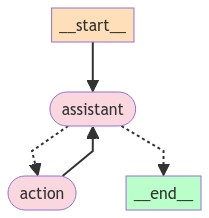

In [ ]:
from IPython.display import Image, display

try:
    display(Image(part_1_graph.get_graph(xray=True).draw_mermaid_png()))
except:
    # This requires some extra dependencies and is optional
    pass

##Example Conversation

In [ ]:
import shutil
import uuid

# Let's create an example conversation a user might have with the assistant
tutorial_questions = [
    "Hi there, what time is my flight?",
    "Am i allowed to update my flight to something sooner? I want to leave later today.",
    "Update my flight to sometime next week then",
    "The next available option is great",
    "what about lodging and transportation?",
    "Yeah i think i'd like an affordable hotel for my week-long stay (7 days). And I'll want to rent a car.",
    "OK could you place a reservation for your recommended hotel? It sounds nice.",
    "yes go ahead and book anything that's moderate expense and has availability.",
    "Now for a car, what are my options?",
    "Awesome let's just get the cheapest option. Go ahead and book for 7 days",
    "Cool so now what recommendations do you have on excursions?",
    "Are they available while I'm there?",
    "interesting - i like the museums, what options are there? ",
    "OK great pick one and book it for my second day there.",
]

# Update with the backup file so we can restart from the original palce in each section
shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": "3442 587242",
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}


_printed = set()
for question in tutorial_questions:
    events = part_1_graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
    for event in events:
        _print_event(event, _printed)

================================ Human Message =================================

Hi there, what time is my flight?
time=2024-05-10T19:23:24.175Z level=INFO source=gpu.go:122 msg="Detecting GPUs"
time=2024-05-10T19:23:24.200Z level=INFO source=cpu_common.go:11 msg="CPU has AVX2"
time=2024-05-10T19:23:26.061Z level=INFO source=cpu_common.go:11 msg="CPU has AVX2"
time=2024-05-10T19:23:26.063Z level=INFO source=server.go:305 msg="starting llama server" cmd="/tmp/ollama4194791431/runners/cpu_avx2/ollama_llama_server --model /root/.ollama/models/blobs/sha256-00e1317cbf74d901080d7100f57580ba8dd8de57203072dc6f668324ba545f29 --ctx-size 2048 --batch-size 512 --embedding --log-disable --parallel 1 --port 35909"
time=2024-05-10T19:23:26.064Z level=INFO source=sched.go:326 msg="loaded runners" count=1
time=2024-05-10T19:23:26.064Z level=INFO source=server.go:464 msg="waiting for llama runner to start responding"
{"function":"server_params_parse","level":"INFO","line":2604,"msg":"logging to file is

KeyError: 'tool'

#persian

In [ ]:
import shutil
import uuid

# Let's create an example conversation a user might have with the assistant
tutorial_questions = [
    "سلام، وقت پرواز من چه ساعتیه؟",
    "آیا میتونم پرواز خودم رو به یه زمان زودتر تغییر بدم؟ میخوام امروز دیرتر حرکت کنم.",
    "پس پرواز من رو برای هفته آینده بروزرسانی کن",
    "اولین گزینه موجود عالیه",
    "درباره محل اقامت و حمل و نقل چی؟",
    "آره فکر کنم یه هتل مقرون به صرفه برای یه اقامت یک هفته ای (7 روز) میخوام. همچنین یه ماشین کرایه میکنم.",
    "باشه، میتونی برای هتل پیشنهادی خودت رزرو کنی؟ به نظر قشنگ میاد.",
    "بله، هرچی که قیمت متوسطی داره و در دسترسه رو رزرو کن.",
    "حالا برای ماشین، چه گزینه هایی دارم؟",
    "عالیه، بریم سراغ ارزان ترین گزینه. برای 7 روز رزرو کن.",
    "باحاله، حالا چه پیشنهادهایی برای گشت و گذار داری؟",
    "آیا وقتی اونجا هستم در دسترس هستند؟",
    "جالبه - من به موزه ها علاقه دارم، چه گزینه هایی وجود داره؟",
    "باشه، عالیه. یکی رو انتخاب کن و برای روز دوم اقامتم رزرو کن.",
]


# Update with the backup file so we can restart from the original palce in each section
shutil.copy(backup_file, db)
thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": "3442 587242",
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}


_printed = set()
for question in tutorial_questions:
    events = part_1_graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
    for event in events:
        _print_event(event, _printed)

================================ Human Message =================================

سلام، وقت پرواز من چه ساعتیه؟
{"function":"process_single_task","level":"INFO","line":1507,"msg":"slot data","n_idle_slots":1,"n_processing_slots":0,"task_id":18,"tid":"137939558209408","timestamp":1715367364}
{"function":"log_server_request","level":"INFO","line":2735,"method":"GET","msg":"request","params":{},"path":"/health","remote_addr":"127.0.0.1","remote_port":33852,"status":200,"tid":"137934317516352","timestamp":1715367364}
{"function":"process_single_task","level":"INFO","line":1507,"msg":"slot data","n_idle_slots":1,"n_processing_slots":0,"task_id":19,"tid":"137939558209408","timestamp":1715367364}
{"function":"log_server_request","level":"INFO","line":2735,"method":"GET","msg":"request","params":{},"path":"/health","remote_addr":"127.0.0.1","remote_port":33852,"status":200,"tid":"137934317516352","timestamp":1715367364}
{"function":"log_server_request","level":"INFO","line":2735,"method":"POST

KeyError: 'tool'